# In-depth Analysis of Breast Cancer Dataset

<hr>

The datset has been obtained from Kaggle, the link is privided <a href="https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/version/2">HERE</a>. The dataset contains the information for the patients in Wisconsin suffering from Breast Cancer. 

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34.

## Attribute Information are as follows:
<ul>
    <li>ID Number</li>
    <li>Diagnosis (M = malignant, B = benign)</li>
    <li>Columns 3 - 32 Contains (The calulations have been performed using three metrics : Mean, Standard Error and Worst. Each section contains 10 columns, in total resulting in 30 columns.) : </li>
    <ol>
        <li>radius (mean of distances from center to points on the perimeter)</li>
        <li>texture (standard deviation of gray-scale values)</li>
        <li>perimeter</li>
        <li>area</li>
        <li>smoothness (local variation in radius lengths)</li>
        <li>compactness (perimeter^2 / area - 1.0)</li>
        <li>concavity (severity of concave portions of the contour)</li>
        <li>concave points (number of concave portions of the contour)</li>
        <li>symmetry</li>
        <li>fractal dimension ("coastline approximation" - 1)</li>
    </ol>
    
</ul>

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

<hr>

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

<hr>

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Read CSV File / DataSet
df = pd.read_csv('data.csv', index_col=False)

# 1. Cleaning Data

In [3]:
# View DataSet
df.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


In [4]:
# check null values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# check for duplicate values
sum(df.duplicated())

0

In [6]:
# Get overview of how many unique values a column has.
def remove_unique(x):
    '''
    Author : Niladri Ghosh
    Email : niladri1406@gmail.com
    
    This function takes in a single argument X - which should be a data frame and then check for each and every column where 
    only single value exists in the whole column and then drop the whole column, finally print out the droppped columns.
    
    '''
    
    uni = x.nunique()
    uniq = pd.DataFrame({'variable':uni.index, 'unique_values':uni.values})
    for i,j in uniq.iterrows():
        if j['unique_values'] == 1:
            print([j.variable])
            x.drop([j.variable], axis = 1, inplace = True)

In [7]:
# remove columns with unique values and print out the names
remove_unique(df)

#### Since there are no columns with unique data, none of the columns have been dropped.

In [8]:
# remove the useless columns
df.drop(['id','Unnamed: 32'], axis=1, inplace=True)

In [9]:
# check shape of dataset
df.shape

(569, 31)

## Observations:

> The following details could be drawn after properly analysing the dataset :
><ul>
    <li>There are no null values in the dataset, other than the automated column Unnamed, we'll remove it anyways.</li>
    <li>No duplicate values present </li>
    <li>Each and every columns have proper data type assigned to them</li>
    <li>Column id contain id of patients and Unnamed: 32 column was generated automatically while reading the csv file there we will remove them as they are of no use.</li>
    <li>After cleaning out the minor issues, our dataset has 31. 
</ul>

__Since there are no issues in the datset. Therefor no cleaning is needed.__


# 2. Exploratory Data Analysis

In order to fully understand the dataset we have to check through each and every aspects of the data. We need to get the grasp of how the data is stored is there any relationship between data which could enhance our analysis.

## 2.1 Descriptive Statistics

In [10]:
# check diagnosis distribution
pd.DataFrame(df.groupby('diagnosis', axis=0).size(), columns=['# of occurence'])

,# of occurence
diagnosis,
B,357
M,212


In [11]:
# check data disctribution
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Obsrvations
> We denote that there are 357 people who were diagonosed as Benign[B] (no cancer cell) and 212 people who were Malignant[M] (presence of cancer cells).

## 2.2 Visualisations

A mojor part of analysis is visualization as understanding a data by representing using a graph or chart is much easier than getting it from numbers. Therefor in this section we will plot these data to get much more insight from it.

#### Data Slicing

As the calculations have been performed using three metices, we would distribute the data into parts viz., mean, se and the worst. This would simplify our jobs.

In [12]:
# slicing and creating new dataframes
df_mean = df.iloc[:,np.r_[0:1,1:11]]
df_se = df.iloc[:,np.r_[0:1,11:21]]
df_worst = df.iloc[:,np.r_[0:1,21:31]]

In [13]:
# rename columns
def rename_columns(x):
    '''
    
    Author : Niladri Ghosh
    Email : niladri1406@gmail.com
    
    The function takes in a single argument, a dataframe and renames the columns to simple format.
    eg - if the column name is "radius_mean" it renames it to "radius" and if the item contains multiple
    "_" it will fetch the last "_" and remove it from there, for instance "fractal_dimention_mean" will be
    "fractal_dimention". Simply speaking it removes the characters after "_" including the "_".
    
    
    '''
    
    new_label = []
    for i in x.columns:
        if '_' in str(i):
            loca = i.rfind('_')
            new_label.append(i[:loca])
        else:
            new_label.append(i)
    x.columns = new_label

In [21]:
# rename each and every columns of all the sliced dataframes and storing to different csv files.
arr = [[df_mean,"data_mean"], [df_se,"data_se"], [df_worst,"data_worst"]]
for i,j in arr:
    rename_columns(i)
    i.to_csv(j+".csv", index=False)


## Through Density Plots

Each column of the dataframe is being observed, the value count / density of each data is being monitored for any patterns.

### Data Set : Mean

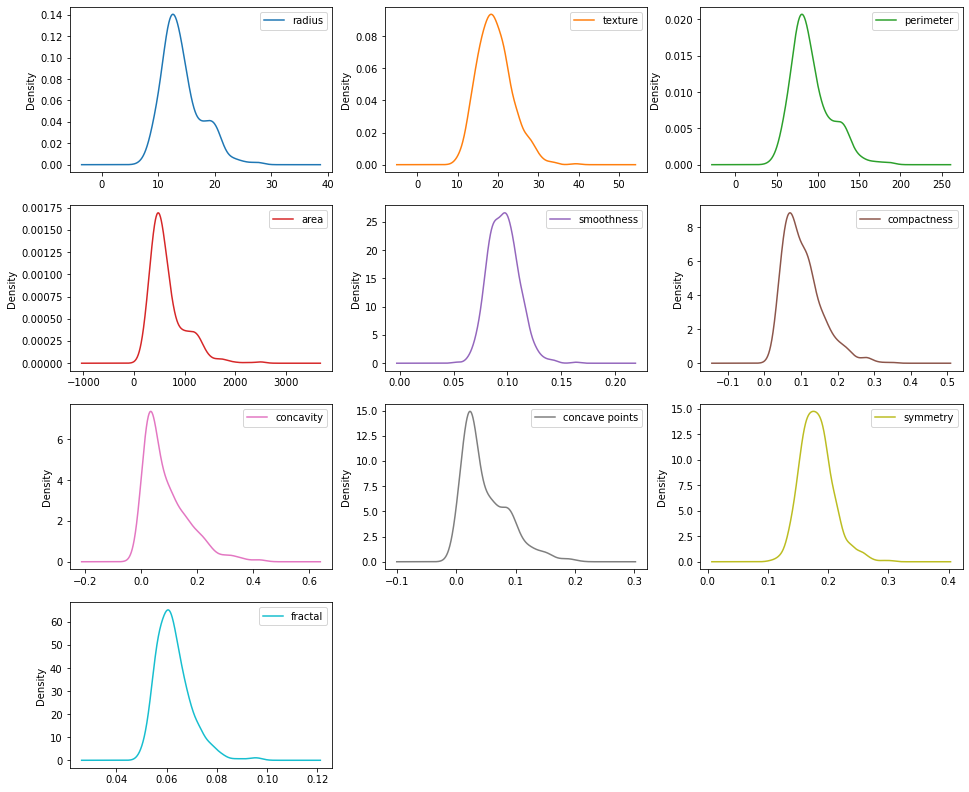

In [45]:
# plot density plot
density_mean=df_mean.plot(kind="density", subplots=True, layout=(4,3), sharex=False, sharey=False, figsize=(16, 14))

### Data Set : Standard Error

In [ ]:
# plot density plot
density_se=df_se.plot(kind="density", subplots=True, layout=(4,3), sharex=False, sharey=False, figsize=(16, 14))

### Data Set : Worst / Largest (mean of three largest values)

In [ ]:
# plot density plot
density_worst=df_worst.plot(kind="density", subplots=True, layout=(4,3), sharex=False, sharey=False, figsize=(16, 14))

### Observations

> We can observe a number of patterns from the above figures. The columns smoothness, symmetry and texture potray a similar to Gaussian distribution as it might come in handy as many of the ml techniques out there use a Gaussian distribution on input variables. We can also observe that columns concave points ans concavity resembles to a exponential distribution.

## Through Box Plots

Plotting box plots for each column to view the distribution of data overall.

### Data Set : Mean

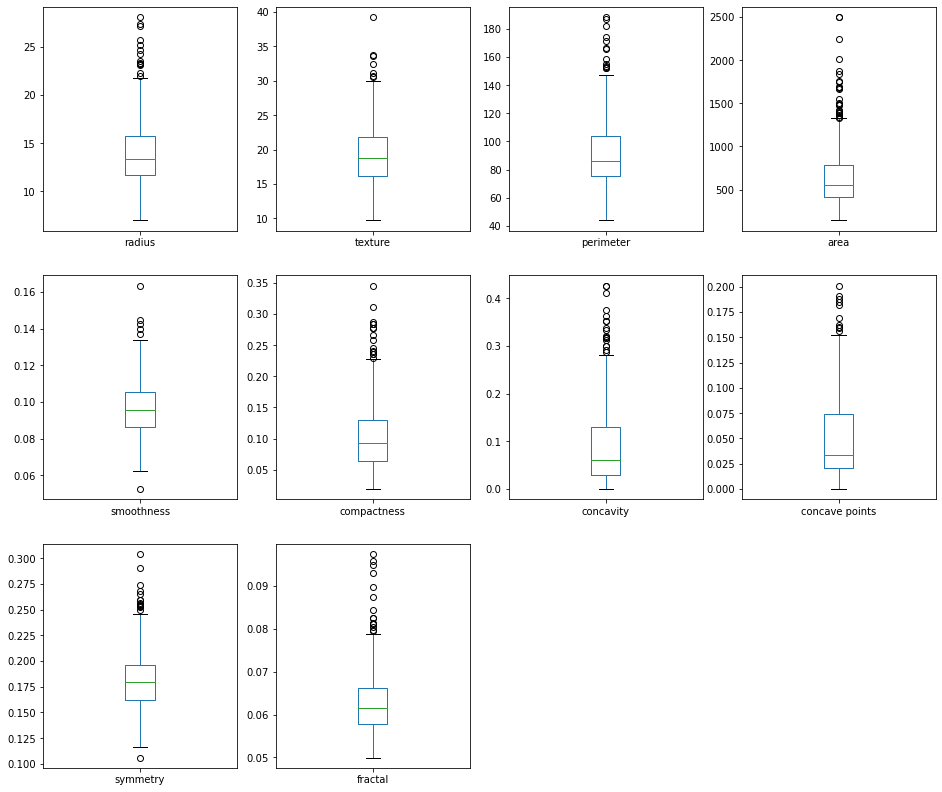

In [54]:
#box plot
box_mean=df_mean.plot(kind= 'box' , subplots=True, layout=(3,4), sharex=False, sharey=False, figsize=(16,14))

### Data Set : Standard Error

In [ ]:
#box plot
box_se=df_se.plot(kind= 'box' , subplots=True, layout=(3,4), sharex=False, sharey=False, figsize=(16,14))

### Data Set : Worst / Largest (mean of three largest values)

In [ ]:
#box plot
box_worst=df_worst.plot(kind= 'box' , subplots=True, layout=(3,4), sharex=False, sharey=False, figsize=(16,14))

### Observations

> 


__The main point of analysis is to ask the right question, so here are the list of questionnaires :__
><ul>
    <li>Is diagnosis dependent on the radius of the tumour ?</li>
    <li>Does texture plays a vital role in the cancer severity ?</li>
    <li>What is the threshold that could lead to malignancy, for the factors like radius, area, smothness and all the different measures?</li>
</ul>